# Importing the libraries




In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

Calling Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Size of Training dataset

In [25]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
X_train_full.dtype

dtype('uint8')

Spliting dataset into Validation and Training dataset

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

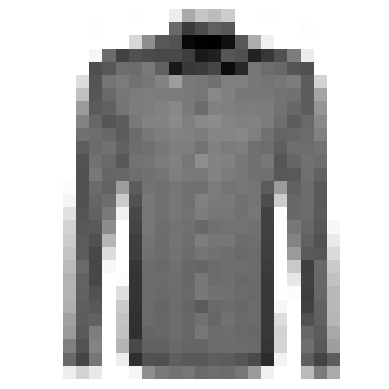

In [9]:
plt.imshow(X_train[15], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train[65]

5

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[13]]

'Shirt'

In [15]:
X_valid.shape

(5000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

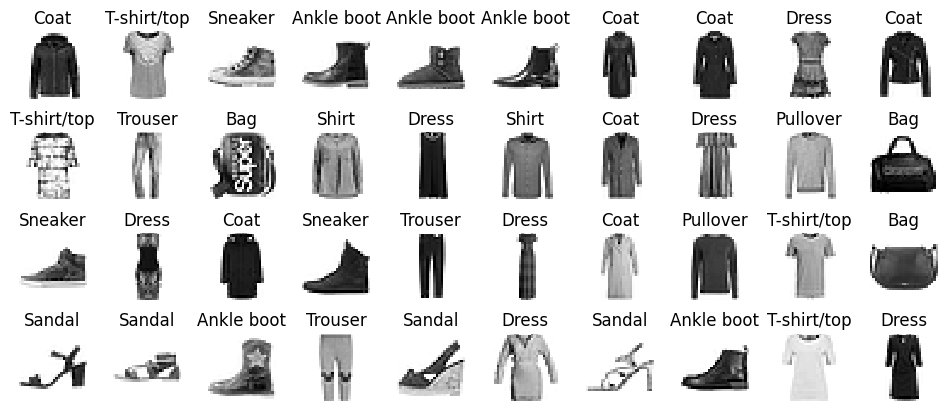

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#model.layers

In [20]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


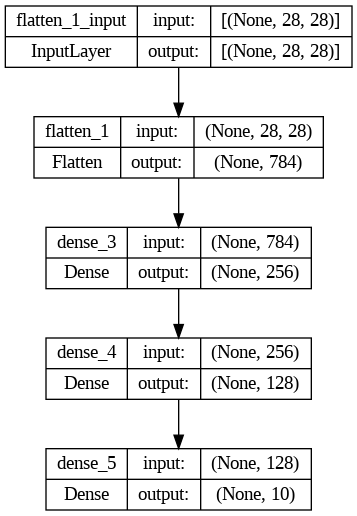

In [21]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.7217 - accuracy: 0.7613 - val_loss: 0.5337 - val_accuracy: 0.8136
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4945 - accuracy: 0.8277 - val_loss: 0.4745 - val_accuracy: 0.8278
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4478 - accuracy: 0.8425 - val_loss: 0.4174 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4210 - accuracy: 0.8518 - val_loss: 0.4101 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3994 - accuracy: 0.8602 - val_loss: 0.4093 - val_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3843 - accuracy: 0.8652 - val_loss: 0.3866 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3716 - accuracy: 0.8690 - val_loss: 0.3666 - val_accuracy:

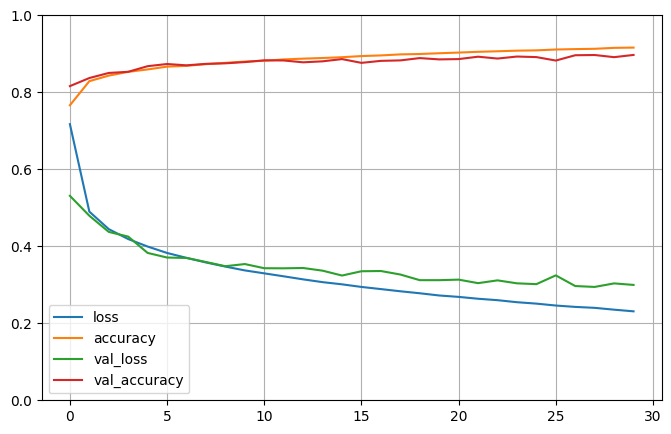

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
_, acc = model.evaluate(X_test,y_test,verbose=0)
#batch_size=5
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 88.3%
